# Discretization with decision trees

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

from feature_engine.discretisation import DecisionTreeDiscretiser

C:\Users\Sole\Documents\Repositories\envs\fe_not\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
# let's separate the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((14448, 8), (6192, 8))

In [4]:
plt.rcParams["figure.dpi"] = 450

# Decision tree discretization with Feature-engine

In [5]:
variables = list(X.columns)[:-2]

variables

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [6]:
# set up the decision tree discretiser indicating:

# cross-validation fold (cv)
# the metric to evaluate model performance (scoring)
# the variables we want to discretise (variables)
# whether it is a target for regression or classification
# and the grid with hyperparameters to optimize the decision tree

disc = DecisionTreeDiscretiser(
    bin_output="boundaries",
    precision=3,
    cv=3,
    scoring="neg_mean_squared_error",
    variables=variables,
    regression=True,
    param_grid={"max_depth": [1, 2, 3], "min_samples_leaf": [10, 20, 50]},
)

disc.fit(X_train, y_train)

DecisionTreeDiscretiser(bin_output='boundaries',
                        param_grid={'max_depth': [1, 2, 3],
                                    'min_samples_leaf': [10, 20, 50]},
                        precision=3,
                        variables=['MedInc', 'HouseAge', 'AveRooms',
                                   'AveBedrms', 'Population', 'AveOccup'])

In [7]:
disc.binner_dict_

{'MedInc': [-inf,
  2.2342000007629395,
  3.066849946975708,
  3.934849977493286,
  5.0286500453948975,
  6.08745002746582,
  7.815150022506714,
  8.865099906921387,
  inf],
 'HouseAge': [-inf, 4.5, 21.5, 26.5, 50.5, 51.5, inf],
 'AveRooms': [-inf,
  2.9773117303848267,
  5.503764390945435,
  6.116896629333496,
  6.374305248260498,
  7.392428398132324,
  10.776524066925049,
  18.912001609802246,
  inf],
 'AveBedrms': [-inf,
  1.0491342544555664,
  1.1032844185829163,
  1.53049236536026,
  inf],
 'Population': [-inf, 324.5, 332.5, 691.5, 1159.5, 1169.5, 11603.5, inf],
 'AveOccup': [-inf,
  1.5547402501106262,
  2.0455236434936523,
  2.840608596801758,
  3.1356699466705322,
  3.4493484497070312,
  3.5482521057128906,
  3.859981656074524,
  inf]}

In [8]:
# let's transform the data

train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

train_t[variables].head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
1989,"(-inf, 2.234]","(51.5, inf]","(-inf, 2.977]","(-inf, 1.049]","(-inf, 324.5]","(3.86, inf]"
256,"(2.234, 3.067]","(26.5, 50.5]","(2.977, 5.504]","(1.103, 1.53]","(691.5, 1159.5]","(2.841, 3.136]"
7887,"(6.087, 7.815]","(4.5, 21.5]","(6.374, 7.392]","(1.049, 1.103]","(1169.5, 11603.5]","(3.548, 3.86]"
4581,"(-inf, 2.234]","(4.5, 21.5]","(-inf, 2.977]","(1.103, 1.53]","(1169.5, 11603.5]","(2.841, 3.136]"
1993,"(-inf, 2.234]","(26.5, 50.5]","(2.977, 5.504]","(1.103, 1.53]","(332.5, 691.5]","(3.548, 3.86]"


In [9]:
# Now, instead of returning the interval limits, we
# return the interval number, which is the equivalent
# of ordered ordinal encoding

disc = DecisionTreeDiscretiser(
    bin_output="bin_number",
    cv=3,
    scoring="neg_mean_squared_error",
    variables=variables,
    regression=True,
    param_grid={"max_depth": [1, 2, 3], "min_samples_leaf": [10, 20, 50]},
)

train_t = disc.fit_transform(X_train, y_train)
test_t = disc.transform(X_test)

In [10]:
# let's compare the values of MedInc before and
# after the discretization

X_test["MedInc"].unique(), test_t["MedInc"].unique()

(array([4.1518, 5.7796, 4.3487, ..., 4.1386, 7.875 , 4.6761]),
 array([3, 4, 1, 5, 2, 0, 6, 7], dtype=int64))

In [11]:
train_t[variables].head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
1989,0,5,0,0,0,7
256,1,3,1,2,3,3
7887,5,1,4,1,5,6
4581,0,1,0,2,5,3
1993,0,3,1,2,2,6


In [12]:
# Finally, we return the predictions of the decision tree
# as replacement values

disc = DecisionTreeDiscretiser(
    bin_output="prediction",
    precision=1,
    cv=3,
    scoring="neg_mean_squared_error",
    variables=variables,
    regression=True,
    param_grid={"max_depth": [1, 2, 3], "min_samples_leaf": [10, 20, 50]},
)

train_t = disc.fit_transform(X_train, y_train)
test_t = disc.transform(X_test)

train_t[variables].head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
1989,1.1,2.8,2.0,2.2,2.0,1.4
256,1.5,2.1,1.8,1.9,2.1,2.1
7887,3.5,1.9,2.8,2.1,2.0,1.6
4581,1.1,1.9,2.0,1.9,2.0,2.1
1993,1.1,2.1,1.8,1.9,2.2,1.6


In [13]:
# let's compare the values of MedInc before and
# after the discretization

X_test["AveRooms"].nunique(), test_t["AveRooms"].nunique()

(6034, 7)

In [14]:
# Let's capture the decision tree in a variable

tree = disc.binner_dict_["AveRooms"].best_estimator_

tree

DecisionTreeRegressor(max_depth=3, min_samples_leaf=50)

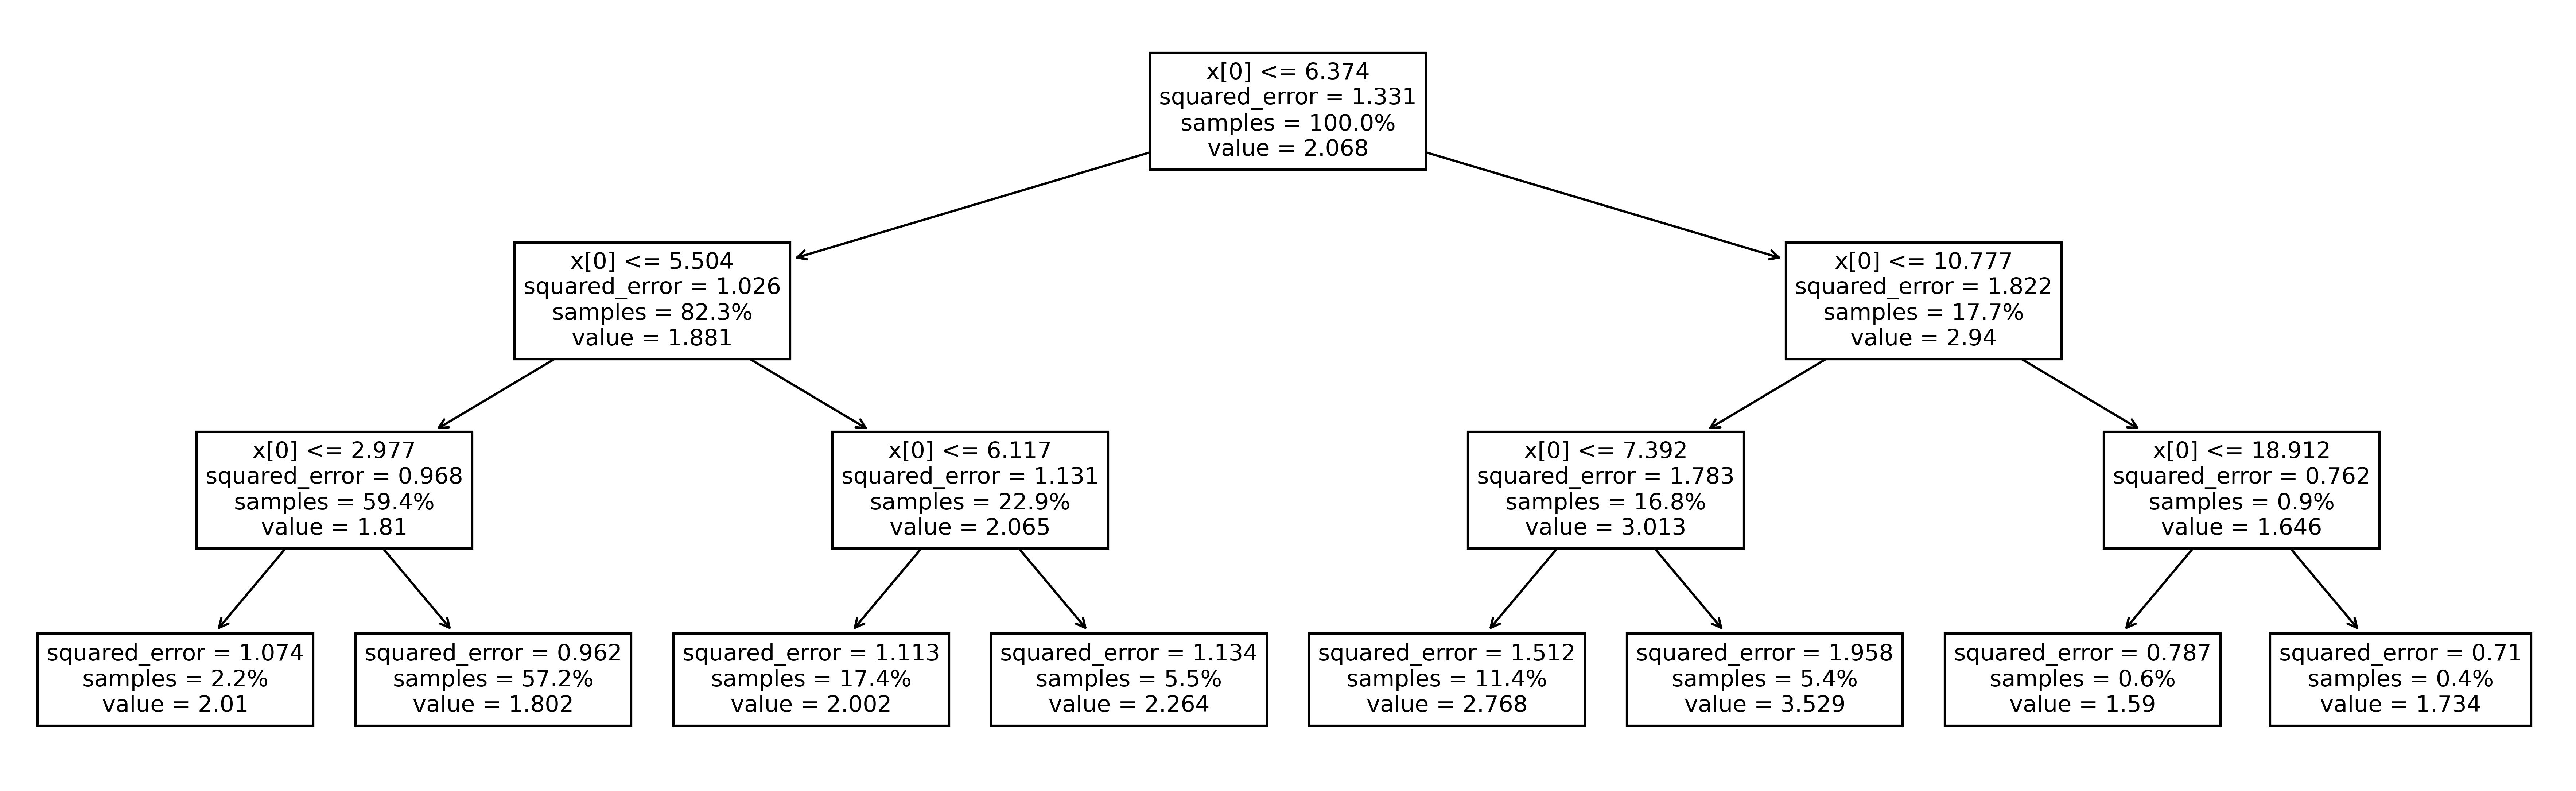

In [15]:
# let's analyize the decision tree

fig = plt.figure(figsize=(20, 6))
plot_tree(tree, fontsize=10, proportion=True)
plt.show()

In [16]:
# we can inspect the best parameters found for the tree for MedInc

disc.binner_dict_["AveRooms"].best_params_

{'max_depth': 3, 'min_samples_leaf': 50}

In [17]:
# the scores for the tree here

disc.scores_dict_["AveRooms"]

-1.1147945251674332

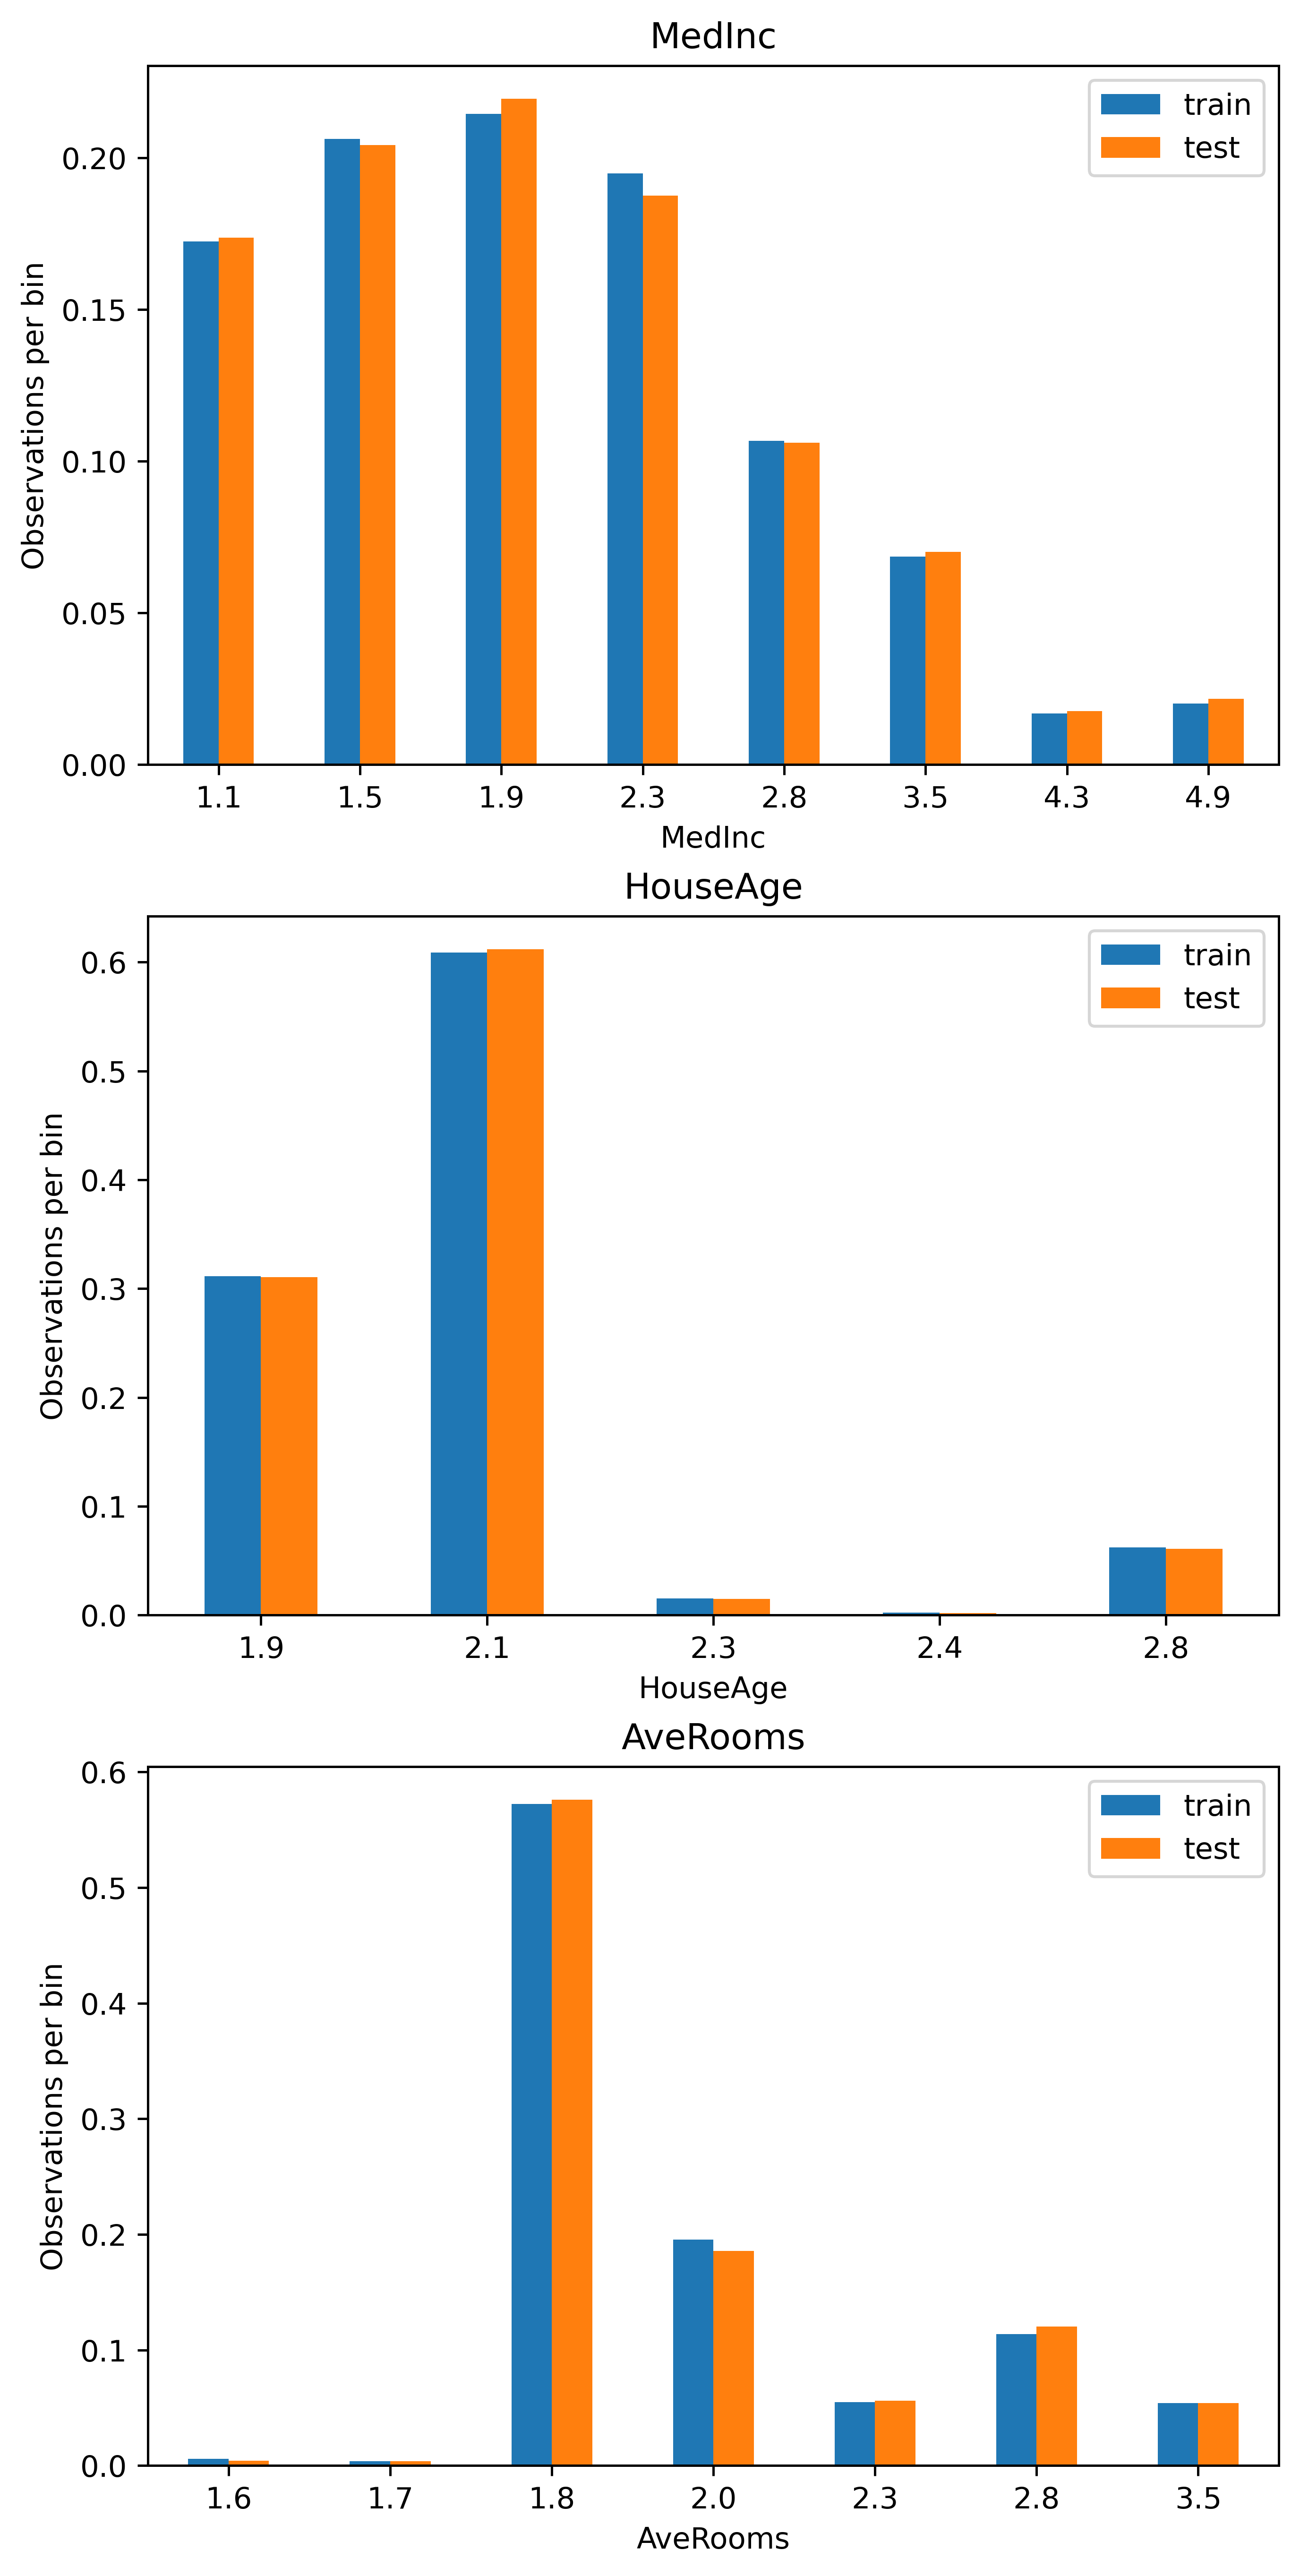

In [18]:
# Let's plot 3 variables:

plt.figure(figsize=(6, 12), constrained_layout=True)

for i in range(3):

    # location in figure
    ax = plt.subplot(3, 1, i + 1)

    # variable to plot
    var = variables[i]

    # determine proportion of observations per bin
    t1 = train_t[var].value_counts(normalize=True)
    t2 = test_t[var].value_counts(normalize=True)

    # concatenate proportions
    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ["train", "test"]

    # order the intervals
    tmp.sort_index(inplace=True)

    tmp.plot.bar(ax=ax)
    plt.xticks(rotation=0)
    plt.ylabel("Observations per bin")

    # add variable name as title
    ax.set_title(var)

plt.show()